In [1]:
# ONLY the following libraries are allowed:
# matplotlib and numpy (imported by %pylab), pandas, scipy, and statsmodels.api.
#  libraries allowed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# CELL1
# Task = Analysing data regarding health in Florida

#Get data from the text file
read_file = pd.read_csv('2017Health.txt', sep='\t', index_col='State')

#Isolate data from specific columns
smokers = read_file['Percentage Smokers'].values
teen_birth = read_file['Teen Birth Rate'].values
violence = read_file['Violent Crime Rate'].values

#Calculate mean / average
mean_smokers = round(smokers.mean(),2)
mean_teen_birth = round(teen_birth.mean(),2)
mean_violence = round(violence.mean(),2)

#Calculate minimum
min_smokers = round(smokers.min(),2)
min_teen_birth = round(teen_birth.min(),2)
min_violence = round(violence.min(),2)

#Calculate maximum
max_smokers = round(smokers.max(),2)
max_teen_birth = round(teen_birth.max(),2)
max_violence = round(violence.max(),2)

#Calculate margin of error
#Using 1.96 as "Z" point estimate value 
error_smokers = 1.96 * (std(smokers) / sqrt(len(smokers)))
error_teen_birth = 1.96 * (std(teen_birth) / sqrt(len(teen_birth)))
error_violence = 1.96 * (std(violence) / sqrt(len(violence)))

#Calculating 95% confidence interval
CI_95_smokers = [ (round(mean_smokers - error_smokers)) , (round(mean_smokers + error_smokers)) ]
CI_95_teen_birth = [ (round( mean_teen_birth - error_teen_birth )) , (round( mean_teen_birth + error_teen_birth)) ]
CI_95_violence = [ (round( mean_violence - error_violence )) , (round( mean_violence + error_violence )) ]


#Put all the values in a new table
data = {
    'Teen Birth Rate': [mean_teen_birth, min_teen_birth, max_teen_birth, CI_95_teen_birth],
    'Violent Crime Rate': [mean_violence, min_violence, max_violence, CI_95_violence],
    'Percentage Smokers': [mean_smokers, min_smokers, max_smokers, CI_95_smokers]
}

# Create the DataFrame
result_table = pd.DataFrame(data, index=['Mean/Average', 'Minimum', 'Maximum', '95% CI'])
result_table


,Teen Birth Rate,Violent Crime Rate,Percentage Smokers
Mean/Average,41.5,409.59,16.92
Minimum,15,127,11
Maximum,77,809,21
95% CI,"[38, 45]","[370, 450]","[16, 17]"


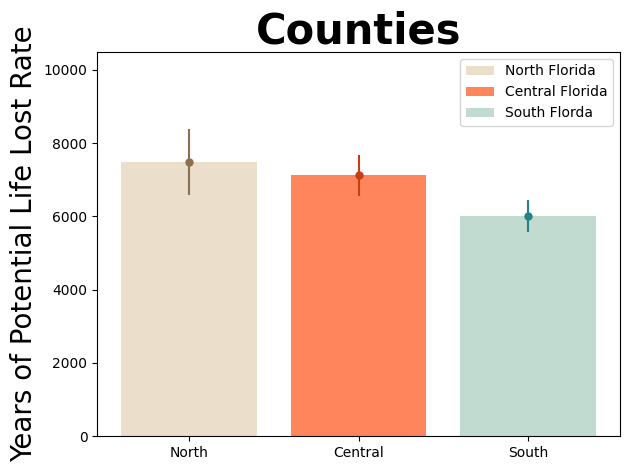

In [3]:
# CELL2
# Task = Analyse data on "Years of Potential Life Lost Rate" in specific counties in Florida 

#Filter data by regions = North, Central, South 
#NORTH
def group_cities(cities):
    mask = read_file['County'].isin(cities)
    return read_file[mask]

north_florida_data = group_cities(['Duval', 'Alachua', 'Leon', 'Flagler', 'Marion'])
central_florida_data = group_cities(['Orange', 'Polk', 'Hillsborough', 'Pinellas', 'Brevard'])
south_florida_data = group_cities(['Miami-Dade', 'Broward', 'Lee', 'Palm Beach', 'Sarasota'])

#Isolate values
def calc_region_years(region, col):
    return region[col].values

north_values = calc_region_years(north_florida_data, 'Years of Potential Life Lost Rate')
central_values = calc_region_years(central_florida_data, 'Years of Potential Life Lost Rate')
south_values = calc_region_years(south_florida_data, 'Years of Potential Life Lost Rate')

#Calculate the sample mean per each region
mean_north = north_values.mean()
mean_central = central_values.mean()
mean_south = south_values.mean()

#Calculate margin of error
#Using 1.96 as "Z" point estimate value
error_north = 1.96 * (std(north_values) / sqrt(len(north_values)))
error_central = 1.96 * (std(central_values) / sqrt(len(central_values)))
error_south = 1.96 * (std(south_values) / sqrt(len(south_values)))

#Calculating the 95% confidence interval 
def calc_confidence_interval(mean, error):
    CI_95 = [ (round(mean - error)) , (round(mean + error)) ]
    return CI_95

CI_95_north = calc_confidence_interval(mean_north, error_north)
CI_95_central = calc_confidence_interval(mean_central, error_central )
CI_95_south = calc_confidence_interval(mean_south, error_south)

# Plotting the bar graph 
bar(['North', 'Central', 'South'], [mean_north, mean_central, mean_south], color=[ '#EBDECB', '#FF855D', '#C1DBD0'], label = ['North Florida', 'Central Florida', 'South Florda'])
title('Counties', fontsize=30, fontweight='bold')
ylabel('Years of Potential Life Lost Rate', fontsize=20)                                                                                                                                                    

# plot means and confidence intervals
plot(0, mean_north, 'o', markersize=5, color='#8c6f51')
errorbar(0, mean_north, yerr=error_north, color='#8c6f51')

plot(1, mean_central, 'o', markersize=5, color='#c73e12')
errorbar(1, mean_central, yerr=error_central, color='#c73e12')

plot(2, mean_south, 'o', markersize=5, color='#218288')
errorbar(2, mean_south, yerr=error_south, color='#218288')

# Style the plot
ylim(0, max(mean_north, mean_central, mean_south) * 1.4)
tight_layout()
legend()
show()



In [4]:
# CELL3
# Task = STATISTICAL DIFFERENCE ANALYSIS
# Data nature = Independent 

'''___________________________________________________________________________________________________________________________________________________________________'''

#1st test = visual
#Function to quickly visualize if the sample mean distributions overlay
#Purpose: get better visual undrstanding of the data
#Methods = errorbar graph and histogram (2 separate functions)

#Initializing variables
save_counter_errorbar = 1
save_counter_histogram = 1

def plot_errorbars(county_1, county_2, mean_1, mean_2, error_1, error_2):
    
    global save_counter_errorbar
    figure(figsize=(12,6)) 
    xticks([0 , 1 ], [county_1, county_2], rotation='horizontal' , fontsize=20)
    title('Average years: ' + county_1 + ' vs. ' + county_2 , fontsize=30, fontweight='bold')
    ylabel('Years of Potential Life Lost Rate', fontsize=20)                                                                                                                                                    

    # plot means and confidence intervals
    plot(0, mean_1, 'o', markersize=10, color='#8c6f51')
    errorbar(0, mean_1, yerr=error_1, color='#8c6f51', capsize=10, elinewidth=3)

    plot(1, mean_2, 'o', markersize=10, color='#218288')
    errorbar(1, mean_2, yerr=error_2, color='#218288',capsize=10, elinewidth=3)

    plot([0, 1], [mean_1, mean_2], 'k--', linewidth=1)

    # Style the plot
    ylim(0, max(mean_north, mean_central, mean_south) * 1.4)
    legend([county_1 + ' Florida', county_2 + ' Florida'])
    tight_layout()
    
    #Changing the image name each time code runs
    filename = f'errorbars_{save_counter_errorbar}.png'
    savefig(filename)

    #Displaying the graph
    show()

    # Increment the counter for the next run
    save_counter_errorbar += 1


def plot_histogram(county_1, county_2, mean_1, mean_2, error_1, error_2):

    global save_counter_histogram
    figure(figsize=(12,6)) 
    N = 2
    ind = arange(N)
    width = 0.5
    colours = ['#FF855D', '#218288']

    bars = bar(ind, [mean_1, mean_2], width, color=colours, yerr=[error_1, error_2], capsize=10 )
    
    #Style
    title('Average years: ' + county_1 + ' vs. ' + county_2 , fontsize=30, fontweight='bold')
    ylabel('Years of Potential Life Lost Rate', fontsize=20)
    xticks([0 , 1 ], [county_1, county_2], rotation='horizontal' , fontsize=20)
    xtickloc = ind
    xticklabels = [county_1, county_2 ]
    xlim([-0.5, 1.5])   
    ylim(0, max(mean_north, mean_central, mean_south) * 1.2)

    #Manually setting lables for each bar
    bars[0].set_label(county_1 + ' mean =' + str(round(mean_1, 2)))
    bars[1].set_label(county_2 + ' mean =' + str(round(mean_2,2 )))
    legend()
                                                                                                                                                    
    
    #Changing the image name each time code runs
    filename = f'histogram_{save_counter_histogram}.png'
    savefig(filename)

    #Displaying the graph
    tight_layout()
    show()

    # Increment the counter for the next run
    save_counter_histogram += 1

#1st test results
'''north_vs_central = plot_errorbars('North', 'Central', mean_north, mean_central, error_north, error_central)
north_vs_south = plot_errorbars('North', 'South', mean_north, mean_south, error_north, error_south)
north_vs_central = plot_errorbars('Central', 'South', mean_central, mean_south, error_central, error_south)

#2nd visual test
north_vs_central = plot_histogram('North', 'Central', mean_north, mean_central, error_north, error_central)
north_vs_south = plot_histogram('North', 'South', mean_north, mean_south, error_north, error_south)
north_vs_central = plot_histogram('Central', 'South', mean_central, mean_south, error_central, error_south)'''

#Check file images to view results

'''___________________________________________________________________________________________________________________________________________________________________'''

#2nd test = Statistical calculations
#Methods: Normality test &  Mann-Whitney U test
#Purpose = further compare the data for clearer conclusion

def conclusion(values_1, values_2, County_1, County_2):
    
    # Test for normal distribution
    normality_1 = stats.shapiro(values_1)
    normality_2 = stats.shapiro(values_2)

    if (normality_1.pvalue > 0.05) and (normality_2.pvalue > 0.05):
        # If data is normally distributed, perform t-test
        _, p_value = stats.ttest_ind(values_1, values_2)

        #If there is significance difference (p < 0.05) --> No more calculations are needed
        if p_value < 0.05:
            return (
                    f"{County_1} vs {County_2}:" + '\n' +
                    "• Normality test: Passed" +'\n' +
                    f"• T-test: {round(p_value, 2)} < 0.05, therefore a significant difference" +'\n' +  
                    "• Mann-Whitney U test: Not performed / Not necessary" +'\n' + 
                    "• Interpretation: \n" + 
                    "  The normality test results indicate that the data for 'Years of Potential Life Lost Rate' in " + County_1 + " and " + County_2 + " Florida follows a normal distribution. \n" +
                    "  The t-test, which assumes normality, shows a statistically significant difference in the means of the two regions. \n" +
                    "  This suggests that there is a substantial and meaningful difference in the average 'Years of Potential Life Lost Rate' between " + County_1 + " and " + County_2 + ". \n" +
                    "  The Mann-Whitney U test was not performed or deemed unnecessary in this case since the Shapiro-Wilks test shows the data is normalised. \n" +
                    "  Therefore, we can confidently conclude that the observed difference is statistically significant, supporting the rejection of the null hypothesis." + '\n' + '\n'
                    )
        
        #If there is NOT enough significance difference (p >= 0.05)
        else:
            return (
                f"{County_1} vs {County_2}:" + '\n' +
                "• Normality test: Passed" +'\n' +
                f"• T-test: {round(p_value, 2)} >= 0.05, therefore NO significant difference" +'\n' +
                "• Mann-Whitney U test: Not performed / Not necessary" +'\n' + 
                "• Interpretation: The normality test results indicate that the data for 'Years of Potential Life Lost Rate' in " + County_1 + " and " + County_2 + " Florida follows a normal distribution. \n" +
                "  The t-test, which assumes normality, does not show a statistically significant difference in the means of the two regions. \n" +
                "  This suggests that there is no substantial and meaningful difference in the average 'Years of Potential Life Lost Rate' between " + County_1 + " and " + County_2 + ". \n" +
                "  The Mann-Whitney U test was not performed or deemed unnecessary in this case since the Shapiro-Wilks test shows the data is normalised. \n" +
                "  This suggests that there is no strong evidence to reject the null hypothesis, and we can conclude that the 'Years of Potential Life Lost Rate' values in both regions are comparable." + '\n' + '\n'
                )
    
    # If data is not normally distributed, perform Mann-Whitney U test
    else:
        _, mann_whitney_test = stats.mannwhitneyu(values_1, values_2, alternative='two-sided')
        if mann_whitney_test < 0.05:
            return (
                f"{County_1} vs {County_2}:" + '\n' +
                "• Normality test: Failed" + '\n' +
                "• T-test: N/A " +'\n' +  
                f"• Mann-Whitney U test: {round(p_value, 2)} < 0.05, therefore a significant difference" +'\n' +  
                "• Interpretation: The 'Years of Potential Life Lost Rate' data does not follow a normal distribution, as indicated by the failed normality test. " 
                f"Therefore, a T-test is not appropriate for comparison. Instead, we performed the Mann-Whitney U test, which is a non-parametric test suitable for non-normally distributed data." + '\n' +
                "The results indicate significant differences in the median 'Years of Potential Life Lost Rate' between " 
                f"{County_1} and {County_2} in Florida. This suggests that there is a substantial difference in the central tendency of the two datasets." + '\n' + 
                "In conclusion, since the Mann-Whitney U test p-value is less than 0.05, we have enough evidence to reject the null hypothesis." + '\n' + '\n'
            )
        else:
            return (
                f"{County_1} vs {County_2}:" + '\n' +
                "• Normality test: Failed" + '\n' +
                "• T-test: N/A " +'\n' +  
                f"• Mann-Whitney U test: {round(p_value, 2)} < 0.05, therefore NO significant difference" +'\n' +  
                "• Interpretation: The 'Years of Potential Life Lost Rate' data does not follow a normal distribution, as indicated by the failed normality test. " 
                f"Therefore, a T-test is not appropriate for comparison. The Mann-Whitney U test results do not provide enough evidence to reject the null hypothesis,"+
                " suggesting no significant difference in the median 'Years of Potential Life Lost Rate' between " 
                f"{County_1} and {County_2} in Florida." + '\n' +
                "In conclusion, since the Mann-Whitney U test p-value is greater than or equal to 0.05, we fail to reject the null hypothesis." + '\n' + '\n'
            )

# Final answer - OUTPUT = 1 concise paragraphs per comparison 
print("This conclusion is followed after creating 2 visual representations of the data: " + '\n' +
        "• Histogram " + '\n' +
        "• Error-bar " + '\n'
        "**Graphs stored as images in files " + '\n' + '\n'
        "____________________________________" + '\n' + '\n'
        "CONCLUSION"+ '\n'
        "To better understand the data sets and arrive at clearer conclusions, the following calculations where made: " + '\n' + '\n'
        )


print(conclusion(north_values, south_values, 'North', 'South'))
print(conclusion(north_values, central_values, 'North', 'Central'))
print(conclusion(central_values, south_values, 'Central', 'South'))


This conclusion is followed after creating 2 visual representations of the data: 
• Histogram 
• Error-bar 
**Graphs stored as images in files 

____________________________________

CONCLUSION
To better understand the data sets and arrive at clearer conclusions, the following calculations where made: 


North vs South:
• Normality test: Passed
• T-test: 0.03 < 0.05, therefore a significant difference
• Mann-Whitney U test: Not performed / Not necessary
• Interpretation: 
  The normality test results indicate that the data for 'Years of Potential Life Lost Rate' in North and South Florida follows a normal distribution. 
  The t-test, which assumes normality, shows a statistically significant difference in the means of the two regions. 
  This suggests that there is a substantial and meaningful difference in the average 'Years of Potential Life Lost Rate' between North and South. 
  The Mann-Whitney U test was not performed or deemed unnecessary in this case since the Shapiro-Wilks test

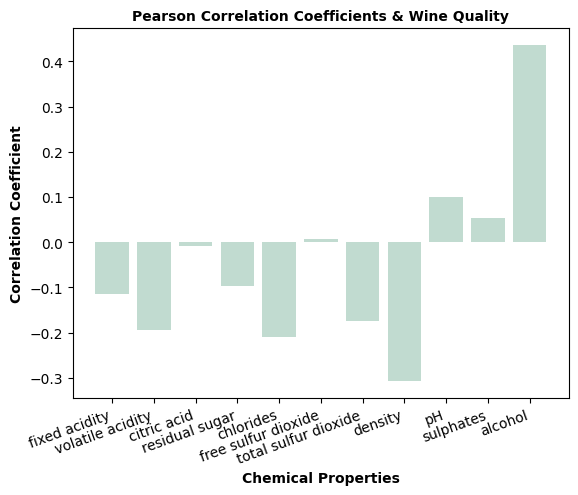

The Pearson correlation coefficients between the chemical properties
and wine quality suggest that there are weak to moderate linear relationships,
with alcohol being the highest value and density the 2nd highest.
Indicating that certain chemical attributes may have some influence on the overall
quality of the wine.


In [6]:
# CELL4
# Task = Analysing linear correlation between chemical properties & wine quality

wine_dataset=pd.read_excel('Wine Quality Dataset.xlsx')
wine_dataset

#This method calculates the Pearson correlation coefficients between all pairs of variables in the dataset.
#The result is a correlation matrix.
correlation_matrix = wine_dataset.corr(method='pearson')


#Drop quality because we don't want to compare quality to itself
quality_correlation = correlation_matrix['quality'].drop('quality')

# Plotting the bar graph
bar(quality_correlation.index, quality_correlation.values, color='#C1DBD0')
title('Pearson Correlation Coefficients & Wine Quality',fontsize=10, fontweight='bold')
xlabel('Chemical Properties', fontweight='bold')
ylabel('Correlation Coefficient', fontweight='bold')
xticks(rotation=20 , ha='right')
show()

print("The Pearson correlation coefficients between the chemical properties" + '\n' +
      "and wine quality suggest that there are weak to moderate linear relationships," + '\n' +
      "with alcohol being the highest value and density the 2nd highest." + '\n' +
      "Indicating that certain chemical attributes may have some influence on the overall" + '\n' +
      "quality of the wine.")

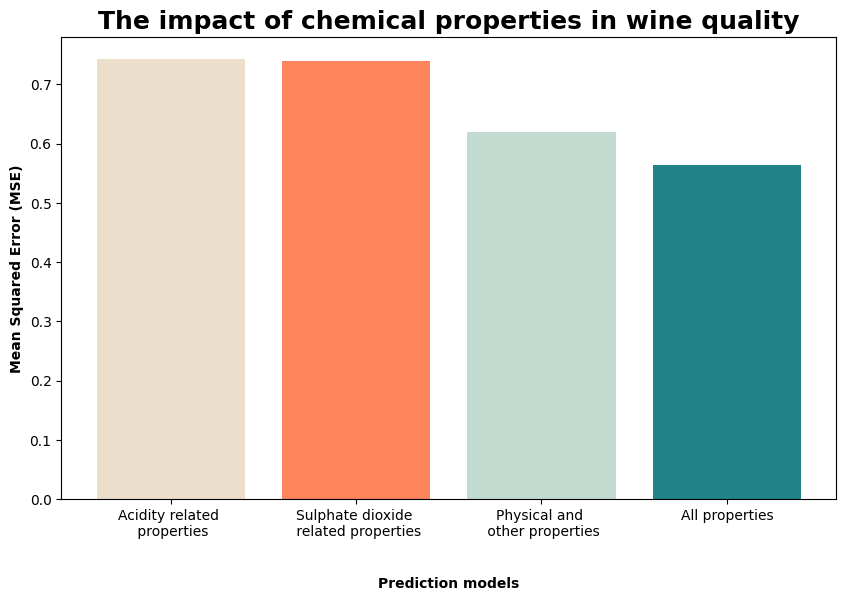

In [7]:
# CELL5
# Task = Linear regression model on wine quality

acronyms = {
    'fixed acidity': 'FA', 
    'volatile acidity': 'VA', 
    'citric acid': 'CA',
    'residual sugar': 'RS',
    'chlorides': 'C', 
    'free sulfur dioxide': 'FSD',
    'total sulfur dioxide': 'TSD', 
    'density': 'D', 
    'pH': 'P', 
    'sulphates': 'S', 
    'alcohol': 'A'
}


models = [ 
    #Acidity related properties
    ['fixed acidity',
     'volatile acidity',
     'citric acid',
     'pH'
    ],

    #Sulphate dioxide related properties
    ['free sulfur dioxide',
     'total sulfur dioxide',
     'sulphates'
    ],

    #Physical and other properties
    ['chlorides',
     'residual sugar',
     'density',
     'alcohol'
    ],

    #All properties
    ['fixed acidity',
     'volatile acidity',
     'citric acid',
     'pH',
     'free sulfur dioxide',
     'total sulfur dioxide',
     'sulphates',
     'chlorides',
     'residual sugar',
     'density',
     'alcohol'
    ],
]

target_variable = 'quality'
mse_values = []

def perform_linear_regression(variables, target):
    X = sm.add_constant(variables)
    results = sm.OLS(wine_dataset[target], X).fit()
    return results 

for list in models:
    results = perform_linear_regression(wine_dataset[list], target_variable)
    result_str = f"Q = {round(results.params['const'], 2)} "

    for index,param in enumerate(results.params[1:]):
        result_str += f"+ {round(param, 2)}*{acronyms[list[index]]} "
    mse_values.append(results.mse_resid)

model_names = ['Acidity related \n properties\n\n  ', 
               'Sulphate dioxide \n related properties\n\n  ', 
               'Physical and \n other properties\n\n  ', 
               'All properties\n\n  '
               ]

# Plotting
figure(figsize=(10, 6))
bar(range(1, (len(models) + 1)), mse_values, color=['#EBDECB','#FF855D','#C1DBD0', '#218288', ])
title('The impact of chemical properties in wine quality', fontweight='bold', fontsize=18)
xticks(range(1, len(model_names) + 1), model_names, fontsize=10) 
xlabel('Prediction models', fontweight='bold')
ylabel('Mean Squared Error (MSE)', fontweight='bold')
show()


       

In [8]:
# CELL6
print(
    "When creating the regression models I chose to compare 3 different groups of properties based \n" +  
    "on the results visualised in the 'Pearson Correlation Coefficients' bar graph, as this\n" + 
    "was a great way to visually understand how these chemical attributes where affecting the quality of the wine. \n" + 
    "I chose to group them by acidity, sulphate/dioxide and pysical properties as they had varied \n" + 
    "correlation coefficients and I wanted to make the models as diverse as possible.  \n" + 
    "The model with all properties turned out to be the most accurate as it had the lowed MSE. \n" + 
    "This happened because the model was considering the most amount of wine qualitites, \n" + 
    "enhancing the model's reliability. However, it's crucial to acknowledge the limitations, such as \n" + 
    "assumptions of linearity between the independent variables, which may affect the model's accuracy. \n"
)



When creating the regression models I chose to compare 3 different groups of properties based 
on the results visualised in the 'Pearson Correlation Coefficients' bar graph, as this
was a great way to visually understand how these chemical attributes where affecting the quality of the wine. 
I chose to group them by acidity, sulphate/dioxide and pysical properties as they had varied 
correlation coefficients and I wanted to make the models as diverse as possible.  
The model with all properties turned out to be the most accurate as it had the lowed MSE. 
This happened because the model was considering the most amount of wine qualitites, 
enhancing the model's reliability. However, it's crucial to acknowledge the limitations, such as 
assumptions of linearity between the independent variables, which may affect the model's accuracy. 



In [9]:
import scipy
print(scipy.__version__)

1.11.3
